In [1]:
# Importing required Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
ibm=pd.read_csv('C:\\Users\\manis\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Understanding the Dataset
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
#Finding the Null values
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

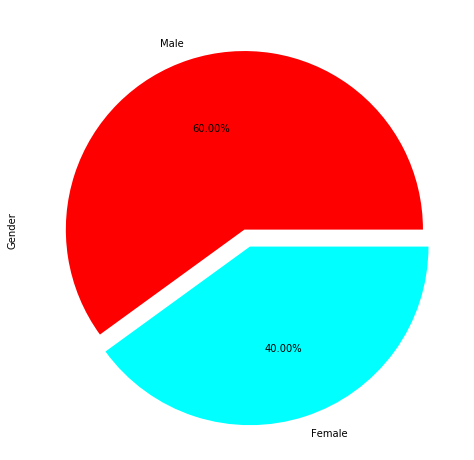

In [5]:
explode=[0,0.1]
plt.figure(figsize=(8,10))
ibm['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=explode,colors = ['#FF0000','#00FFFF'])
plt.show()

Male percentage is high when compared to female

In [6]:
p=ibm.drop(['DailyRate','EmployeeCount','HourlyRate','MonthlyRate','StandardHours','StockOptionLevel','TrainingTimesLastYear','JobLevel','Over18'],axis=1)
p.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,Yes,11,3,1,8,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,No,23,4,4,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,Yes,15,3,2,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,Yes,11,3,3,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,No,12,3,4,6,3,2,2,2,2


In [7]:
#Applying Label encoder
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [8]:
for col in p.columns:
    if p[col].dtypes == 'object':
        p[col] = le.fit_transform(p[col])

In [9]:
p.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,1,2,0,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,1,8,1,1,2,3,1,...,0,23,4,4,10,3,10,7,1,7
2,37,1,2,1,2,2,4,4,4,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,1,3,4,1,5,4,0,...,1,11,3,3,8,3,8,7,3,0
4,27,0,2,1,2,1,3,7,1,1,...,0,12,3,4,6,3,2,2,2,2


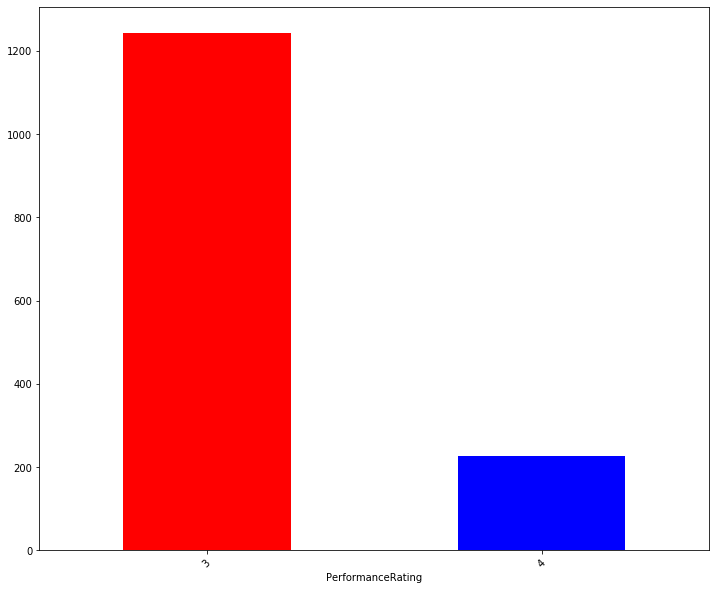

In [10]:
#PerformanceRating count
plt.figure(figsize=(12,10))
p['PerformanceRating'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("PerformanceRating")
plt.show()

3(Excellent) people are more compared to 4(outstanding)

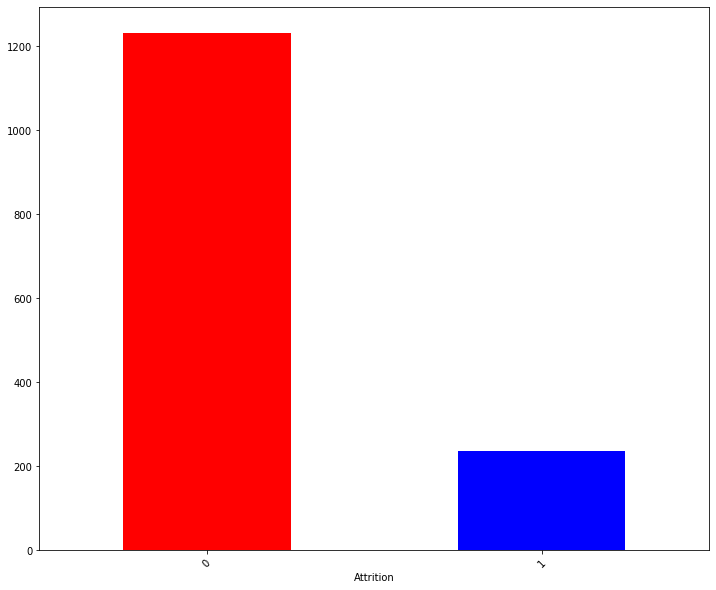

In [11]:
#Attrition count
plt.figure(figsize=(12,10))
p['Attrition'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("Attrition")
plt.show()

Company attrition rate is less

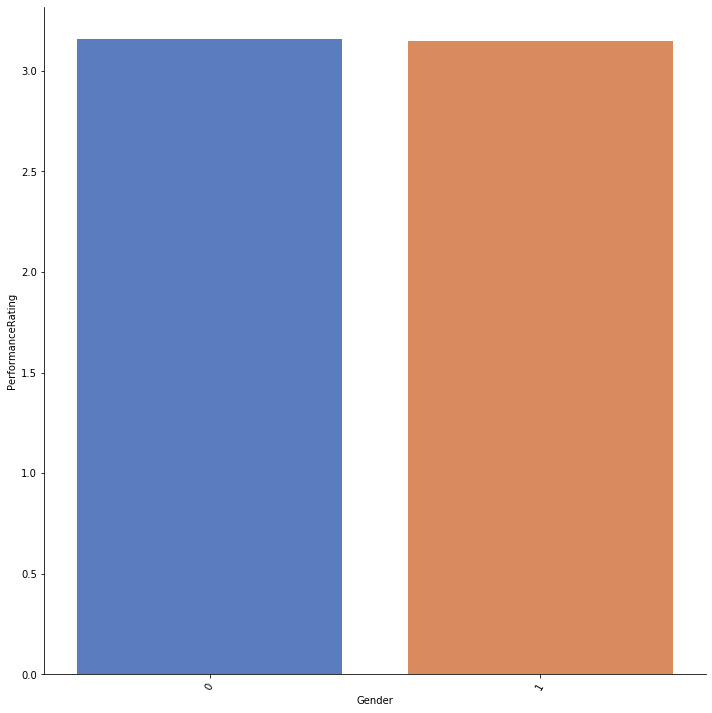

In [12]:
#plot of PerformanceRating Vs Gender
sns.catplot(x="Gender", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

According to performance Females(0) are well compared to males(1)

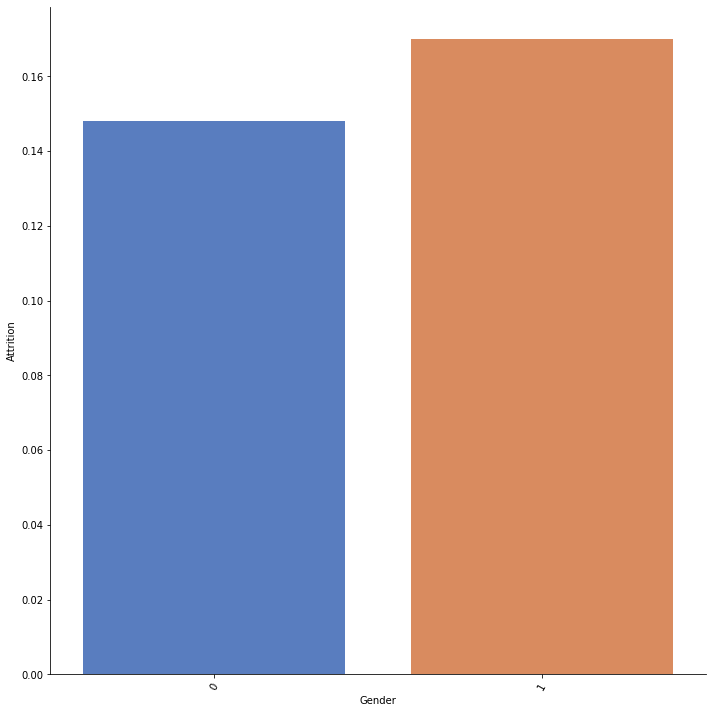

In [13]:
#plot of Attrition Vs Gender
sns.catplot(x="Gender", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

Males(1) attrition rate is high compared to Females(0)

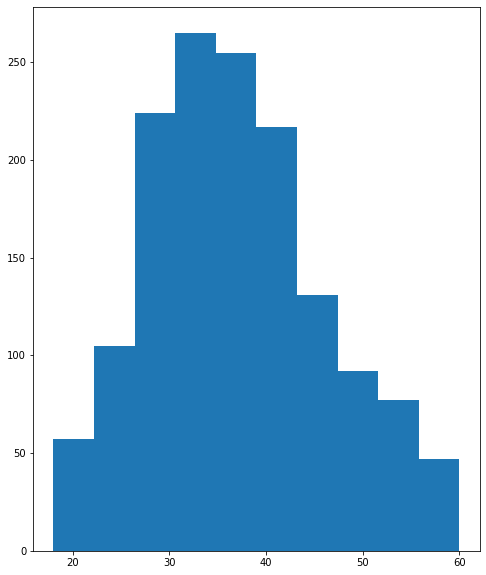

In [14]:
#Plot of age
plt.figure(figsize=(8,10))
plt.hist(ibm['Age']);

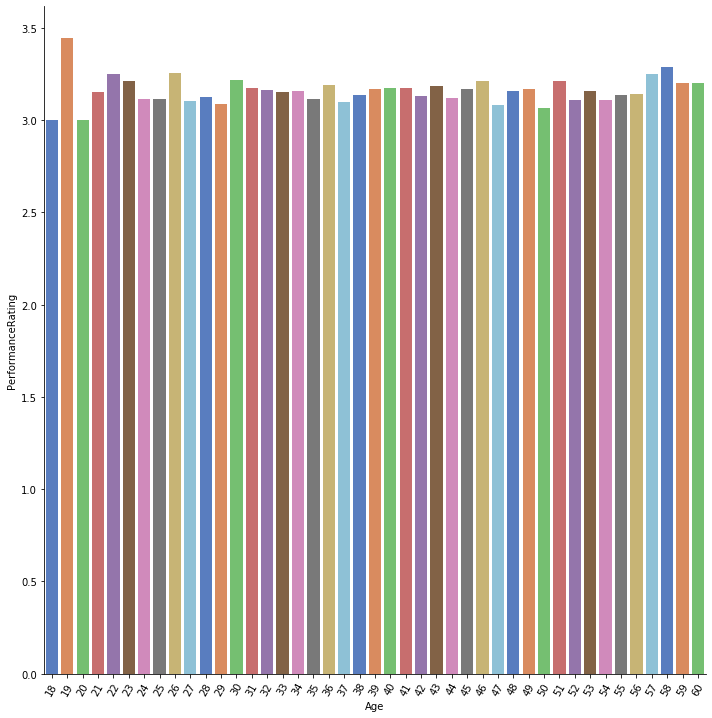

In [15]:
#plot of PerformanceRating Vs Age
sns.catplot(x="Age", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

The performance rating is high @19

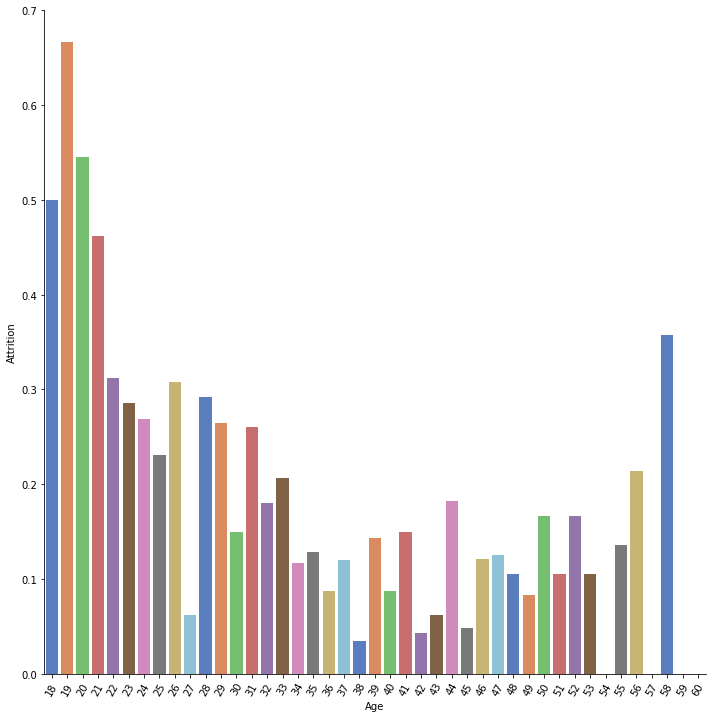

In [16]:
#plot of Attrition Vs Age
sns.catplot(x="Age", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

At the same time the attrition rate is high @19

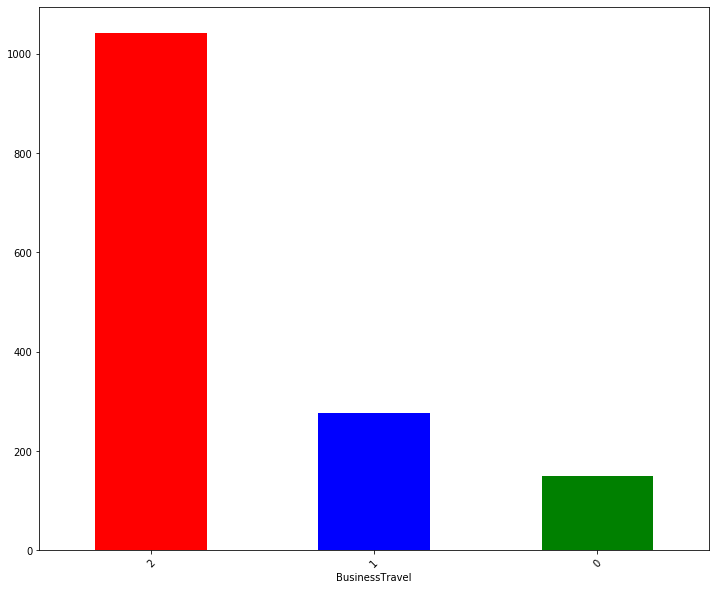

In [17]:
#BusinessTravel count
plt.figure(figsize=(12,10))
p['BusinessTravel'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("BusinessTravel")
plt.show()

People are more in 2(Travel_Rarely) catogery compared to 1(Travel_frequently) and 0(Non_Traveller)

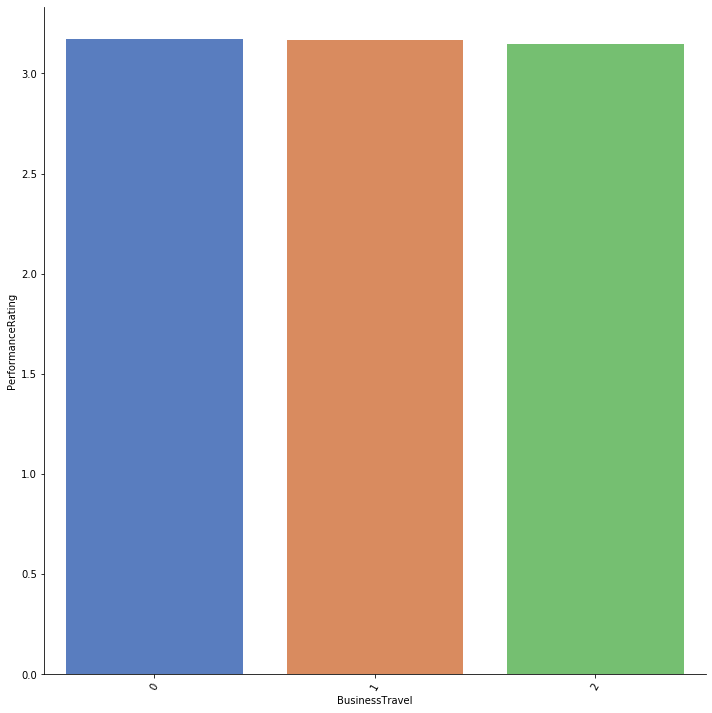

In [18]:
#plot of PerformanceRating Vs BusinessTravel
sns.catplot(x="BusinessTravel", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

1(Travel_frequently) and 0(Non_Traveller) performances are high when compared to 2(Travel_Rarely)

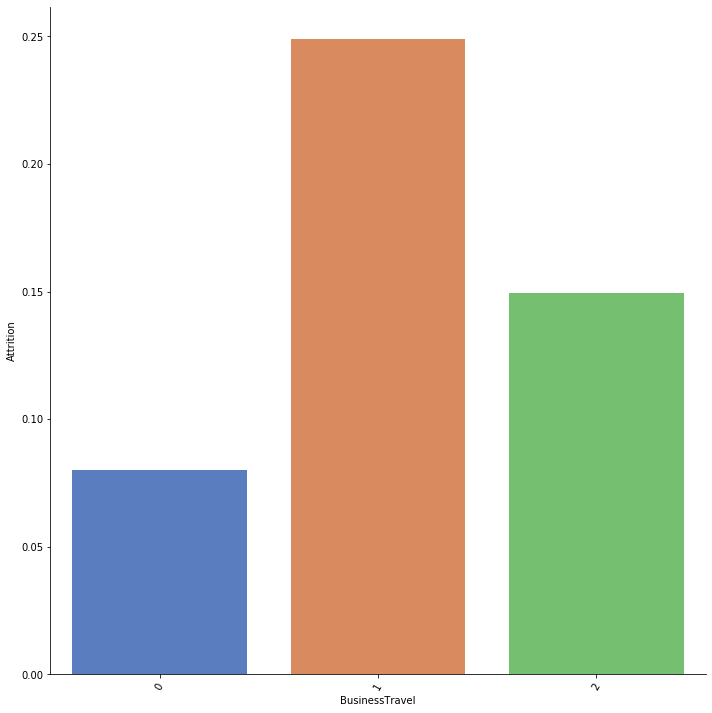

In [19]:
#plot of Attrition Vs BusinessTravel
sns.catplot(x="BusinessTravel", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

1(Travel_frequently) attrition rate is high

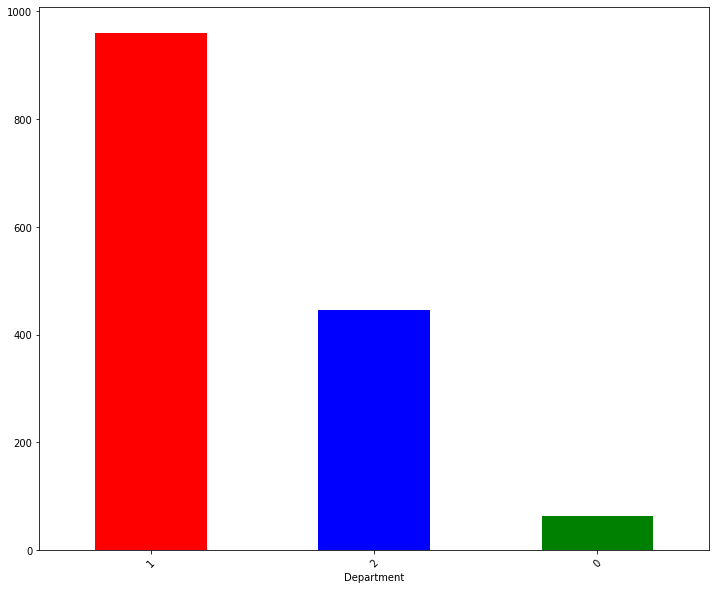

In [20]:
#Department count
plt.figure(figsize=(12,10))
p['Department'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.show()

1(Research & Development) department is high compared to 2(Sales) and 0(Human Resorces)

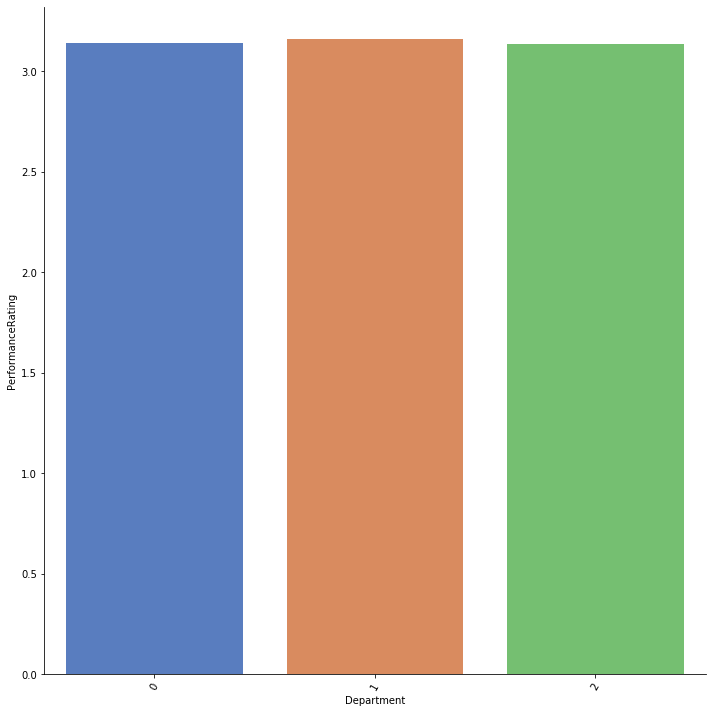

In [21]:
#plot of PerformanceRating Vs Department
sns.catplot(x="Department", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

According to Performance there is a slight change between 3 departments 

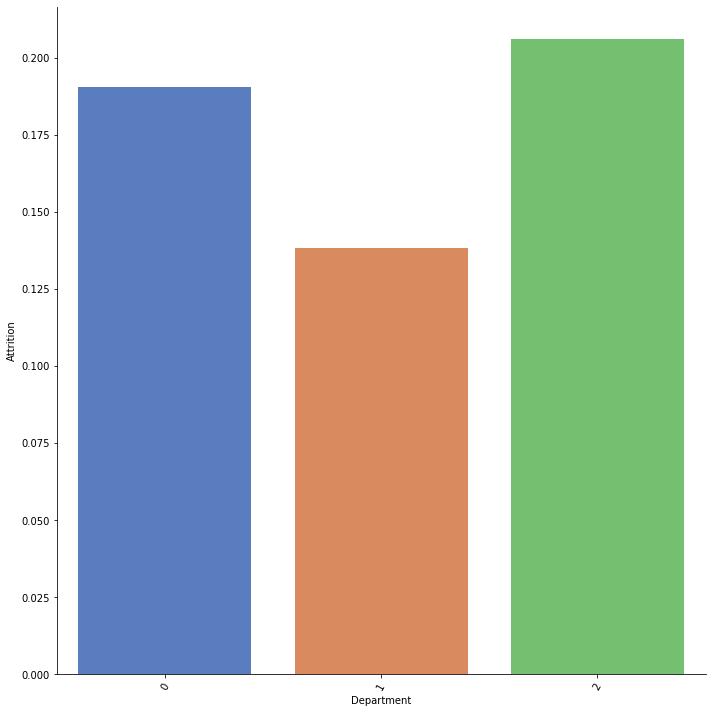

In [22]:
#plot of Attrition Vs Department
sns.catplot(x="Department", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

 Attrition rate of 2(Sales) and 0(Human Resorces) are high

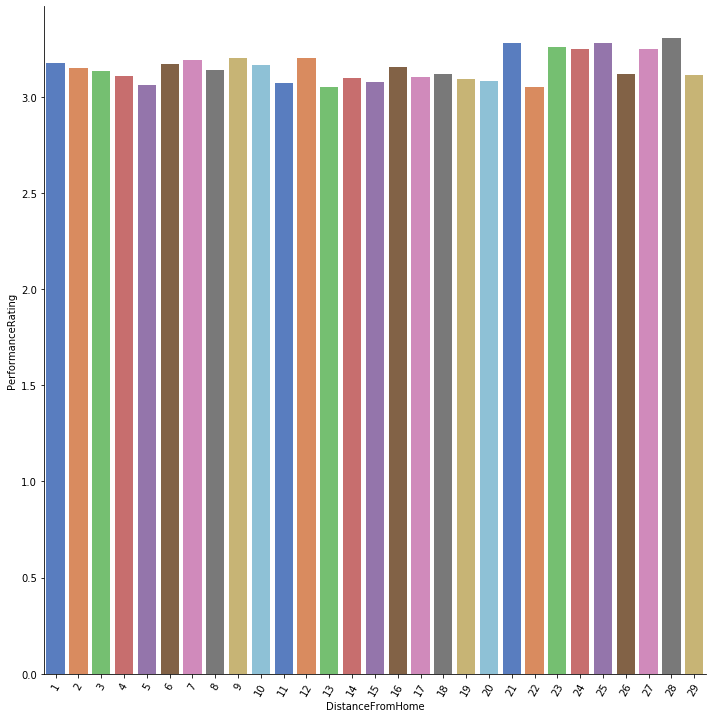

In [23]:
#plot of PerformanceRating Vs DistanceFromHome
sns.catplot(x="DistanceFromHome", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

Irrespective of distance all are performimg well

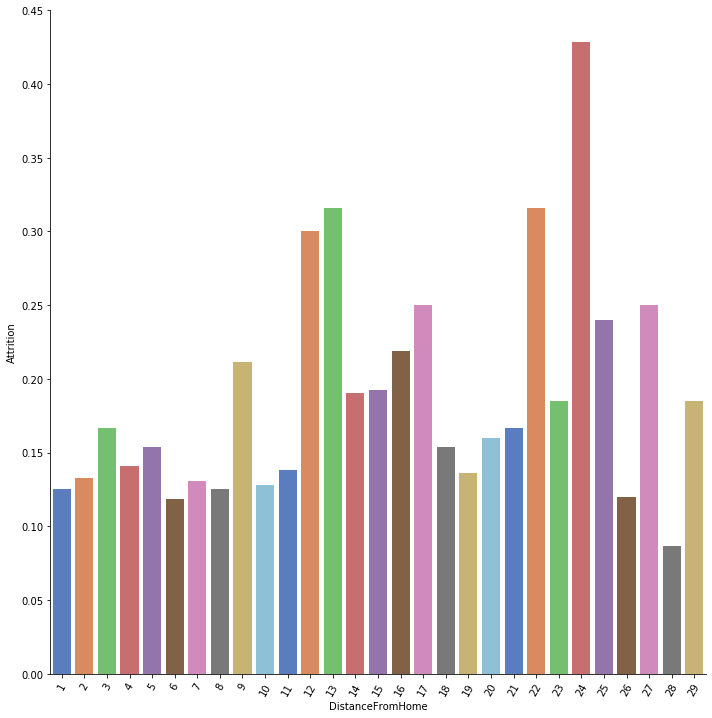

In [24]:
#plot of Attrition Vs DistanceFromHome
sns.catplot(x="DistanceFromHome", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

But the attrition rate of 24km catagory is more

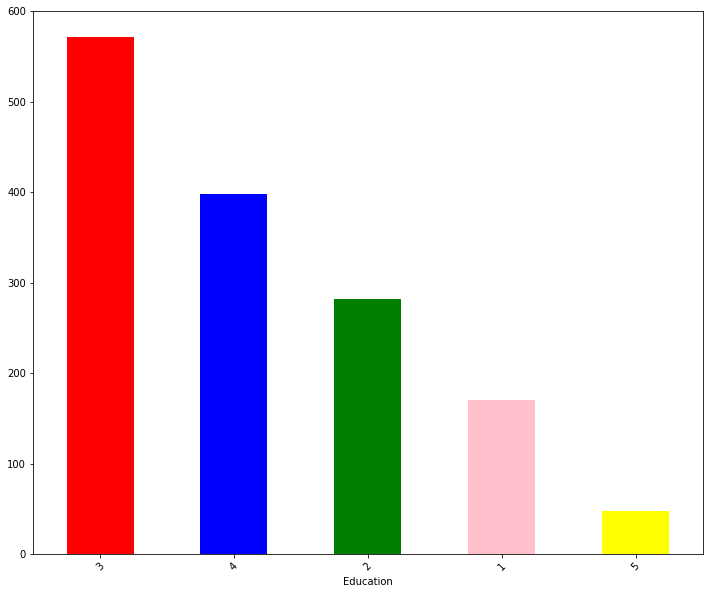

In [25]:
#Education count
plt.figure(figsize=(12,10))
p['Education'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("Education")
plt.show()

3(Bachelor) are more compared to 1(Below College),2(College),4 (Master),5 (Doctor)

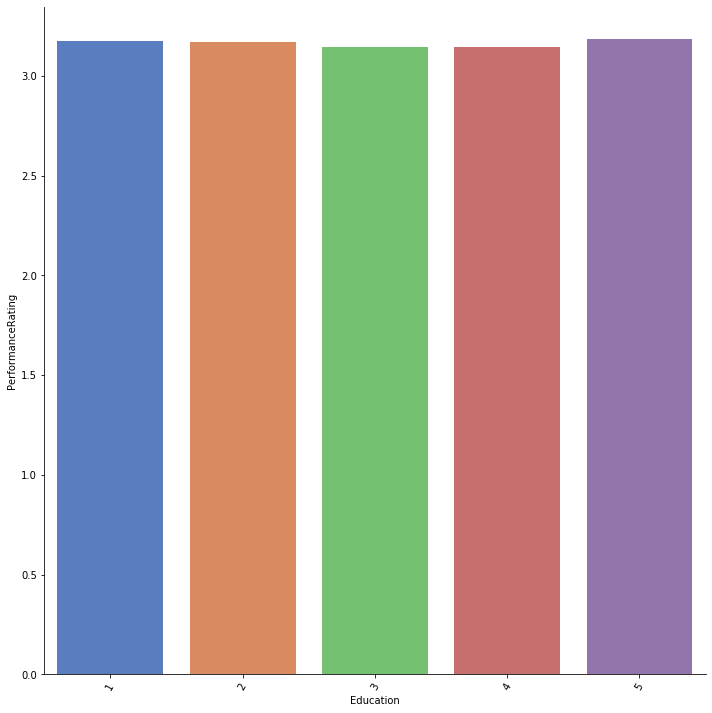

In [26]:
#plot of PerformanceRating Vs Education
sns.catplot(x="Education", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

5 (Doctor) are performing well

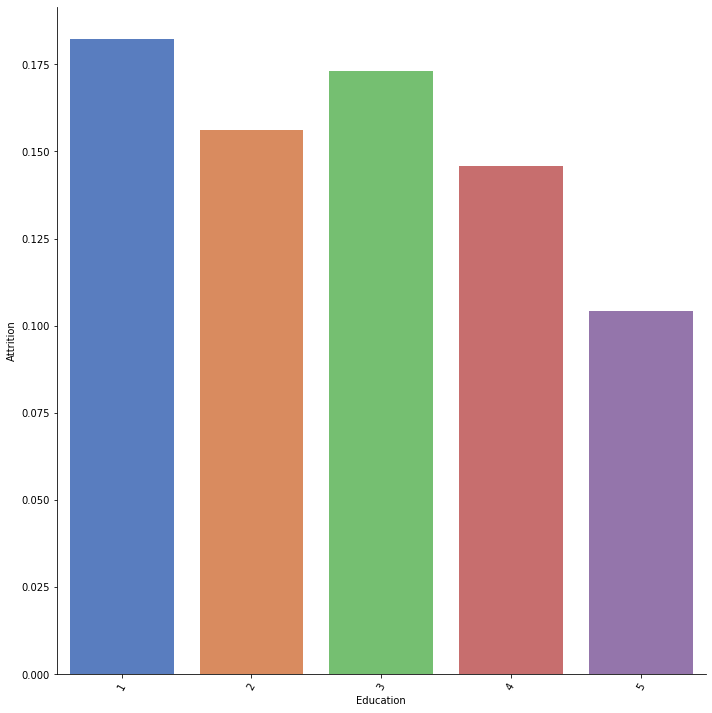

In [27]:
#plot of Attrition Vs DistanceFromHome
sns.catplot(x="Education", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

1(Below College) attrition rate is high

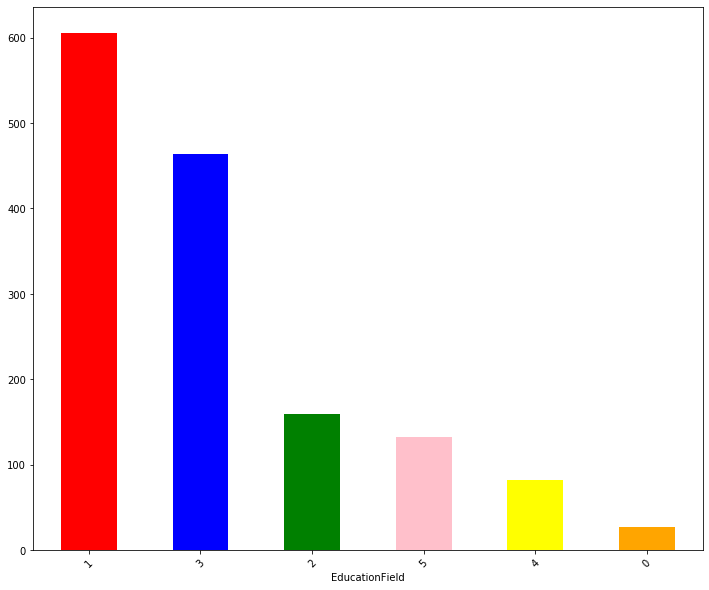

In [28]:
#EducationField count
plt.figure(figsize=(12,10))
p['EducationField'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("EducationField")
plt.show()

1(Life Sciences) and 3(Medical) are high when compared to 4(Others), 5(Technical Degree), 0(Human Resources), 2(Marketing)

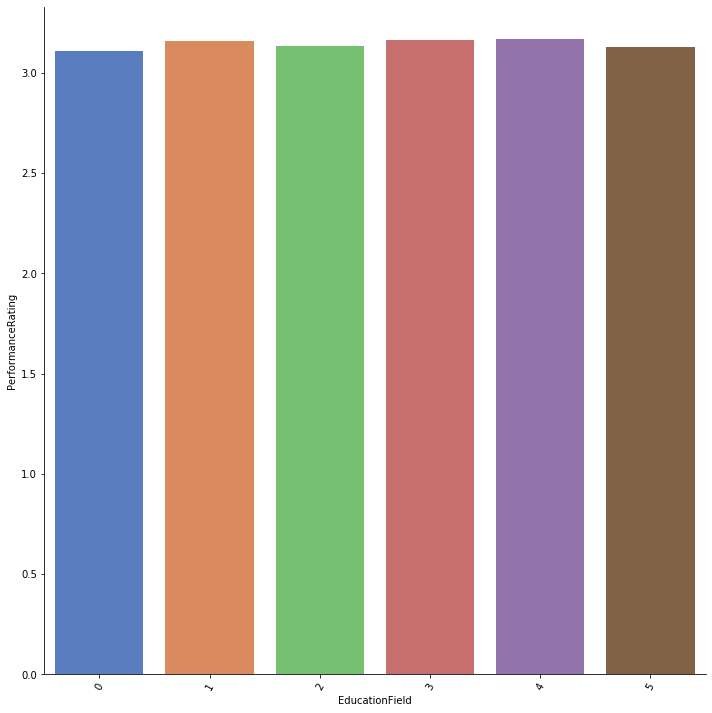

In [29]:
#plot of PerformanceRating Vs EducationField
sns.catplot(x="EducationField", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

Irrespective of education field, all are oerforming well

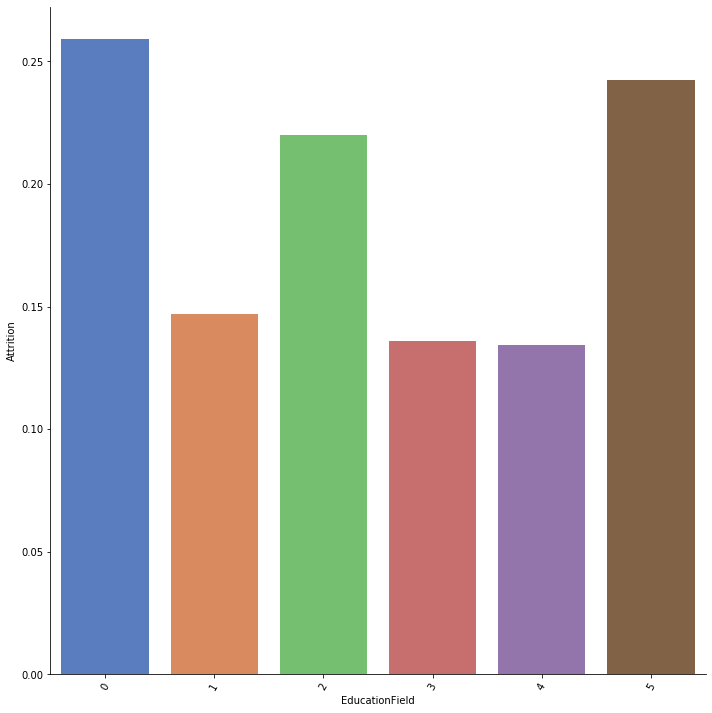

In [30]:
#plot of Attrition Vs DistanceFromHome
sns.catplot(x="EducationField", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

5(Technical Degree), 0(Human Resources) attrition rates are high

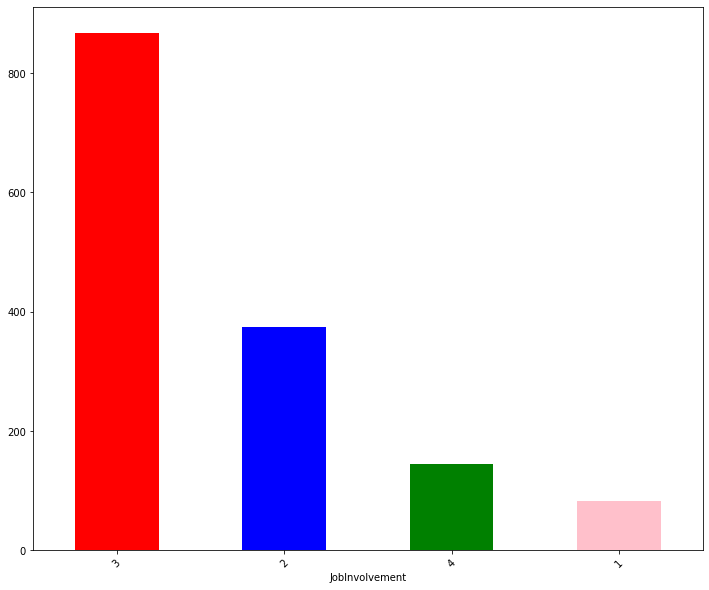

In [31]:
#JobInvolvement count
plt.figure(figsize=(12,10))
p['JobInvolvement'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("JobInvolvement")
plt.show()

3 (High) are high when compared to 1 (Low),2 (Medium) ,4 (Very High)

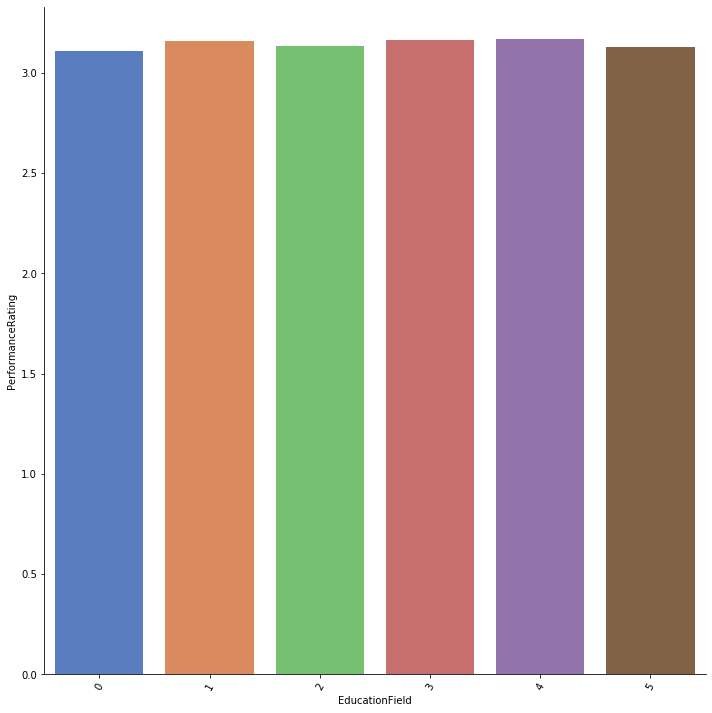

In [32]:
#plot of PerformanceRating Vs JobInvolvement
sns.catplot(x="EducationField", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

Irrespective of Job Involvement, every one are performing well

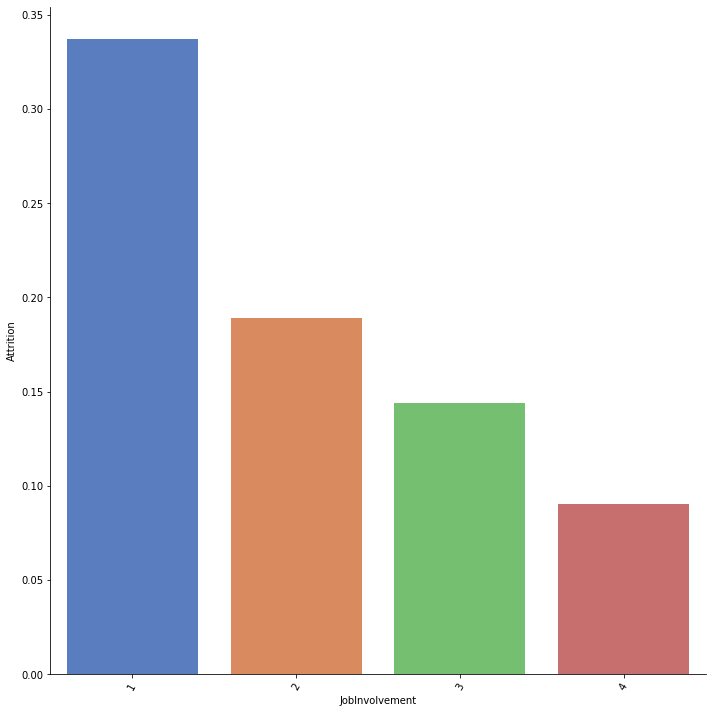

In [33]:
#plot of Attrition Vs JobInvolvement
sns.catplot(x="JobInvolvement", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

1 (Low) attrition rate is high

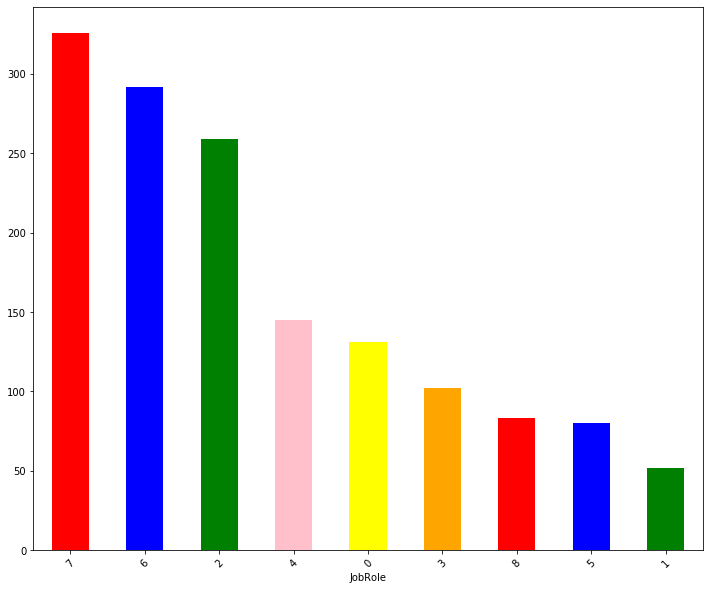

In [34]:
#JobRole count
plt.figure(figsize=(12,10))
p['JobRole'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("JobRole")
plt.show()

7(Sales Executive) are high when compared to 0(Healthcare Representative),1(Human Resources),2(Laboratory Technician),3(Manager),4(Manufacturing Director),5(Research Director),6(Research Scientist),8(Sales Representative)

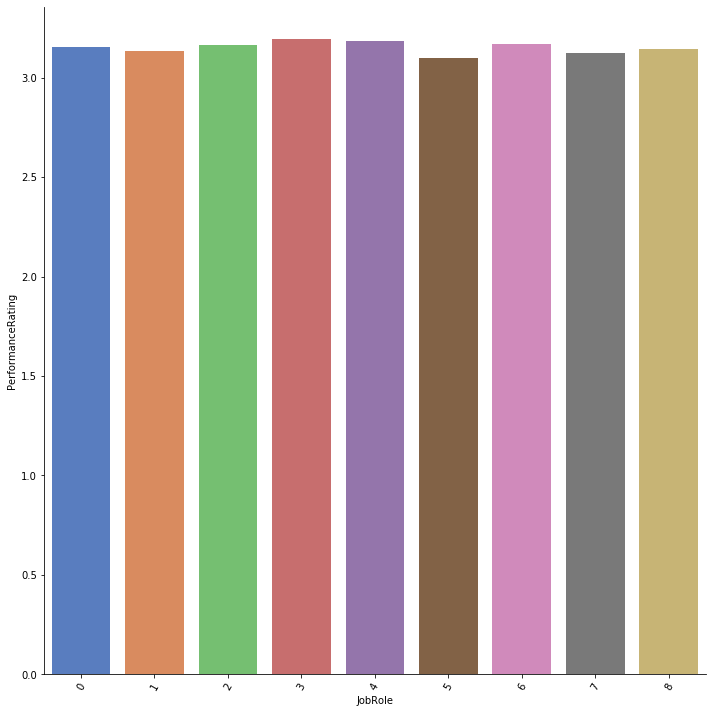

In [35]:
#plot of PerformanceRating Vs JobRole
sns.catplot(x="JobRole", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

irrespective of job role all are performing well

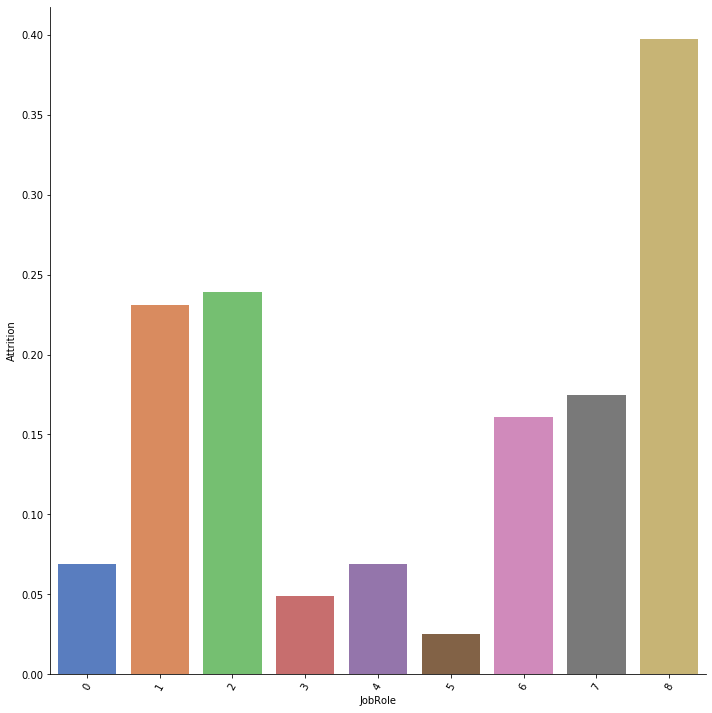

In [36]:
#plot of Attrition Vs JobRole
sns.catplot(x="JobRole", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

8(Sales Representative) attrition rate is high

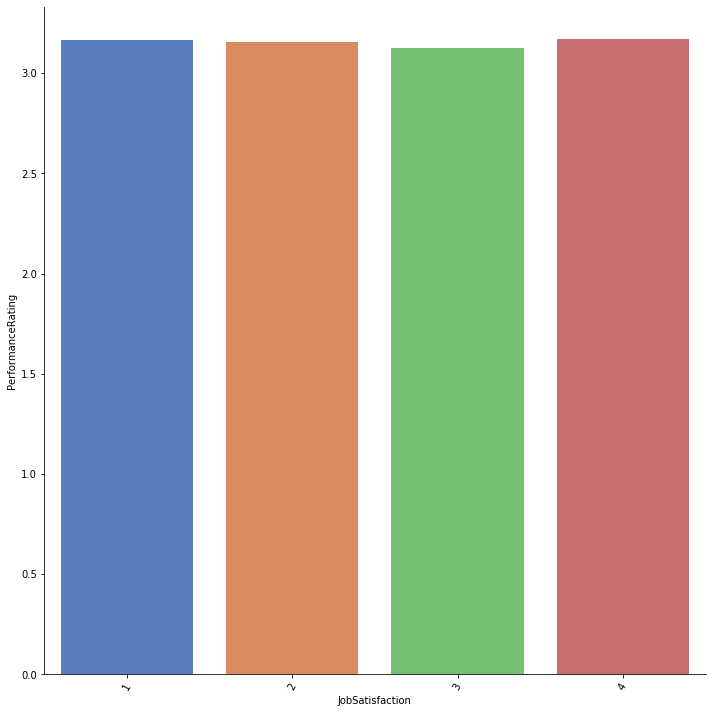

In [37]:
#plot of PerformanceRating Vs JobSatisfaction
sns.catplot(x="JobSatisfaction", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

4 'Very High' are performing well when compared to 1 'Low', 2 'Medium', 3 'High'

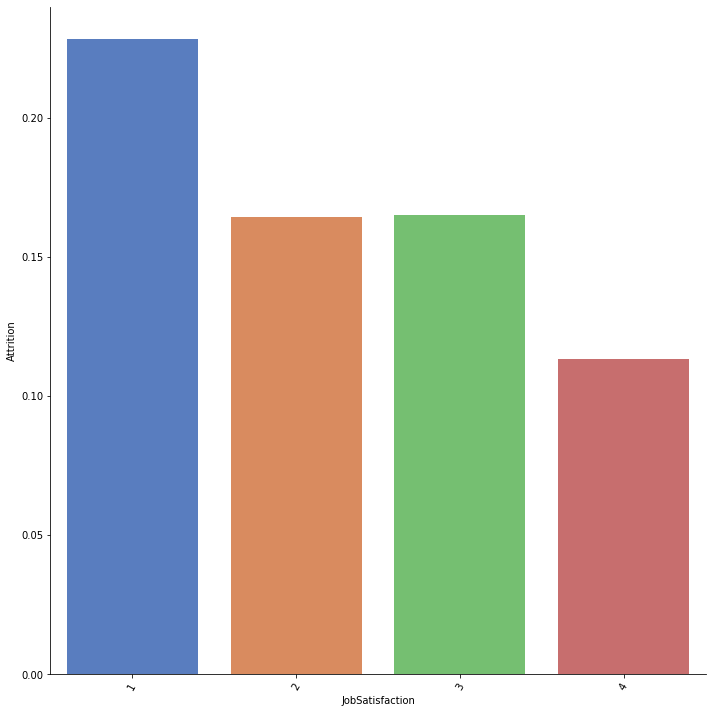

In [38]:
#plot of Attrition Vs JobSatisfaction
sns.catplot(x="JobSatisfaction", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

1 'Low' attrition rate is high

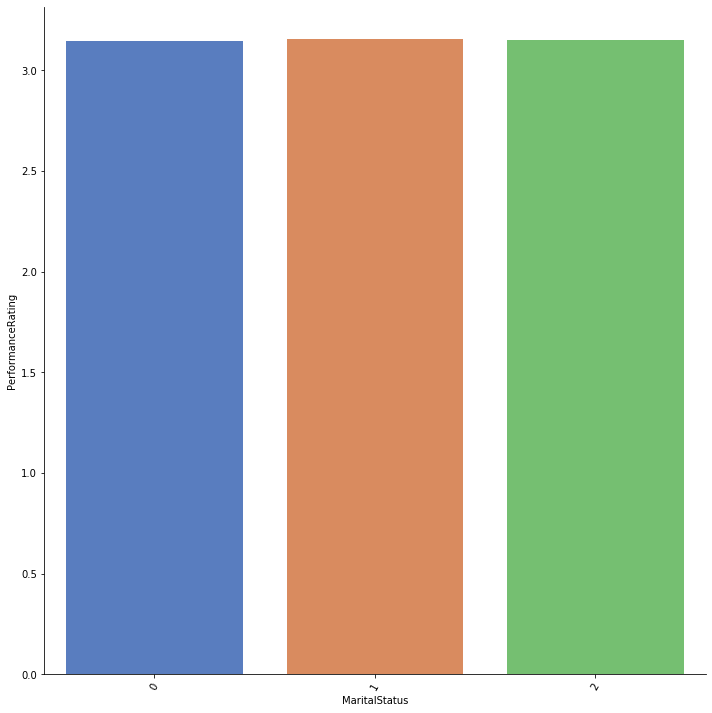

In [39]:
#plot of PerformanceRating Vs MaritalStatus
sns.catplot(x="MaritalStatus", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

0(single), 1(married),2(Divorced) all are performing well

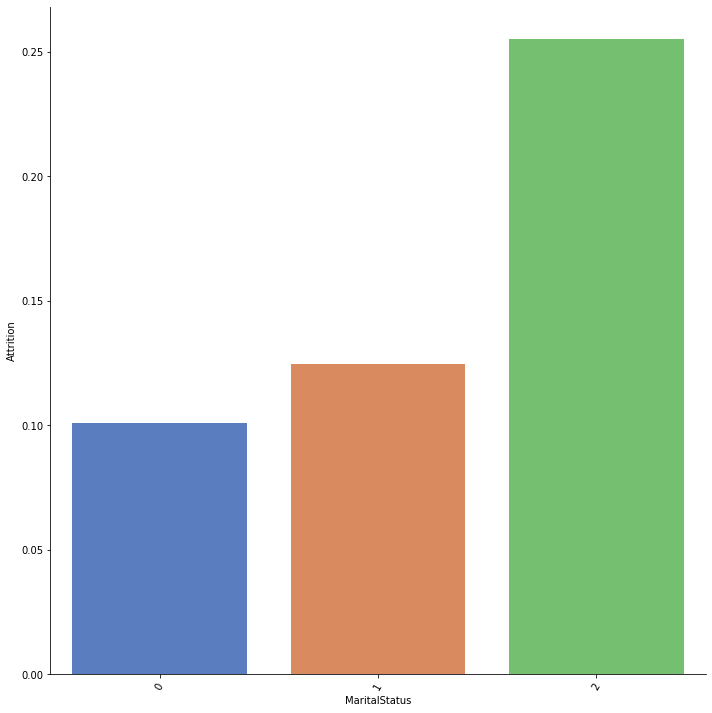

In [40]:
#plot of Attrition Vs MaritalStatus
sns.catplot(x="MaritalStatus", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

2(Divorced) attrition rate is high

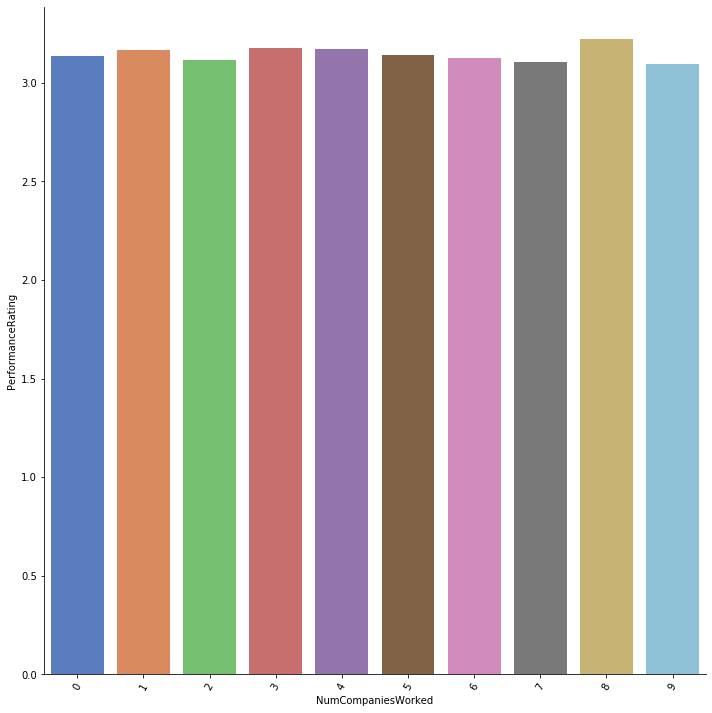

In [41]:
#plot of PerformanceRating Vs NumCompaniesWorked
sns.catplot(x="NumCompaniesWorked", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

person who worked in 8 compinies is performing well

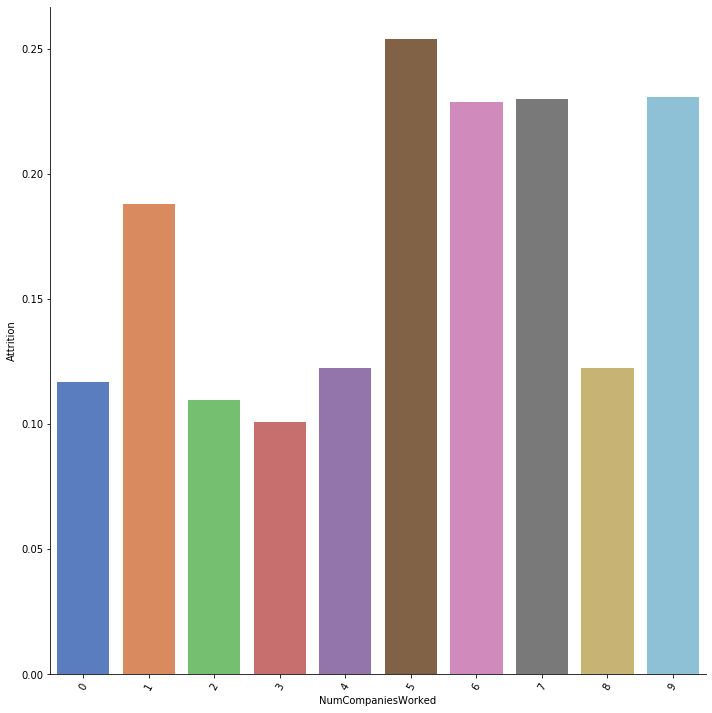

In [42]:
#plot of Attrition Vs NumCompaniesWorked
sns.catplot(x="NumCompaniesWorked", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

person who worked in 5 companies attrition rate is high

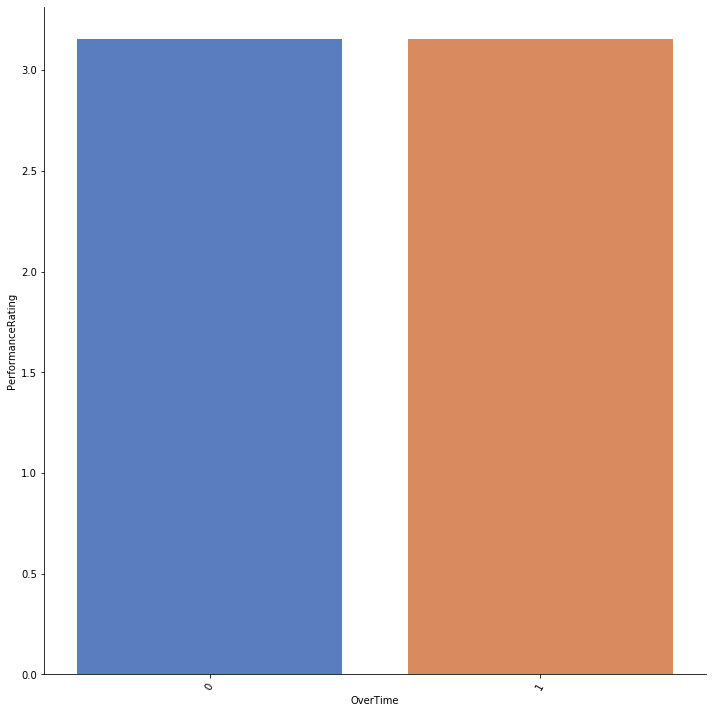

In [43]:
#plot of PerformanceRating Vs OverTime
sns.catplot(x="OverTime", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

0(No),1(Yes), both are performing well

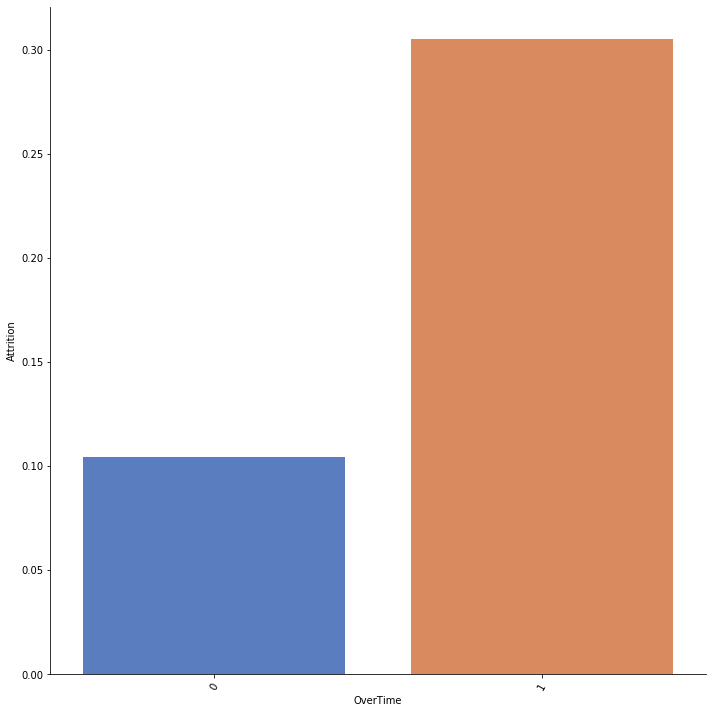

In [44]:
#plot of Attrition Vs OverTime
sns.catplot(x="OverTime", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

1(Yes) attrition rate is high

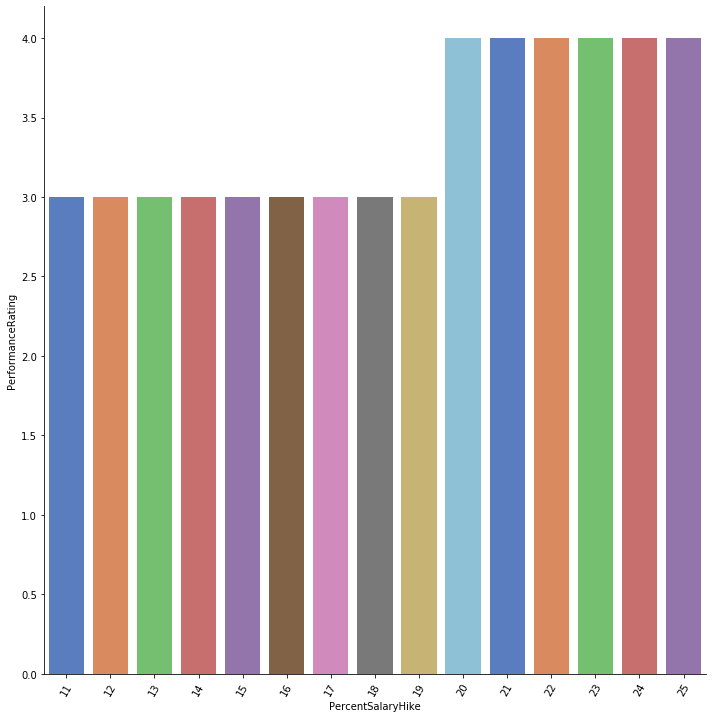

In [45]:
#plot of PerformanceRating Vs PercentSalaryHike
sns.catplot(x="PercentSalaryHike", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

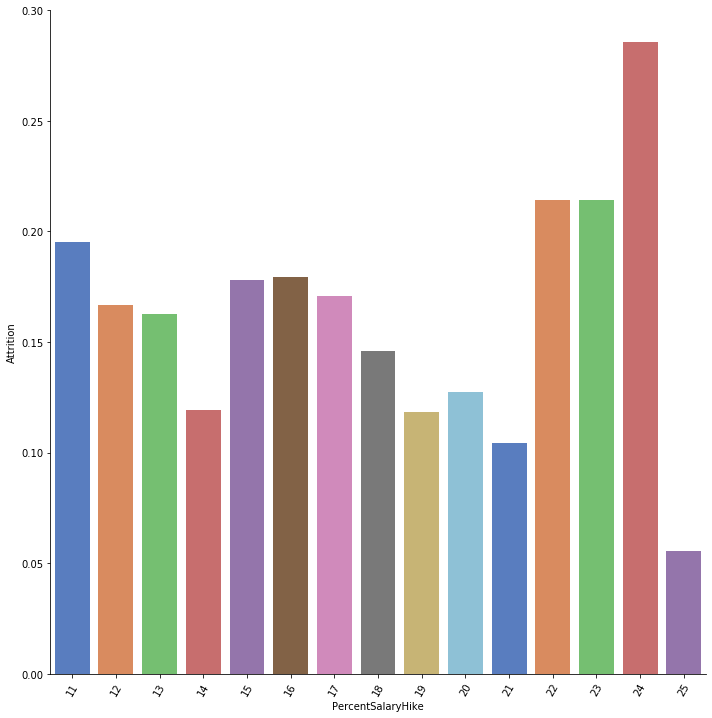

In [46]:
#plot of Attrition Vs PercentSalaryHike
sns.catplot(x="PercentSalaryHike", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

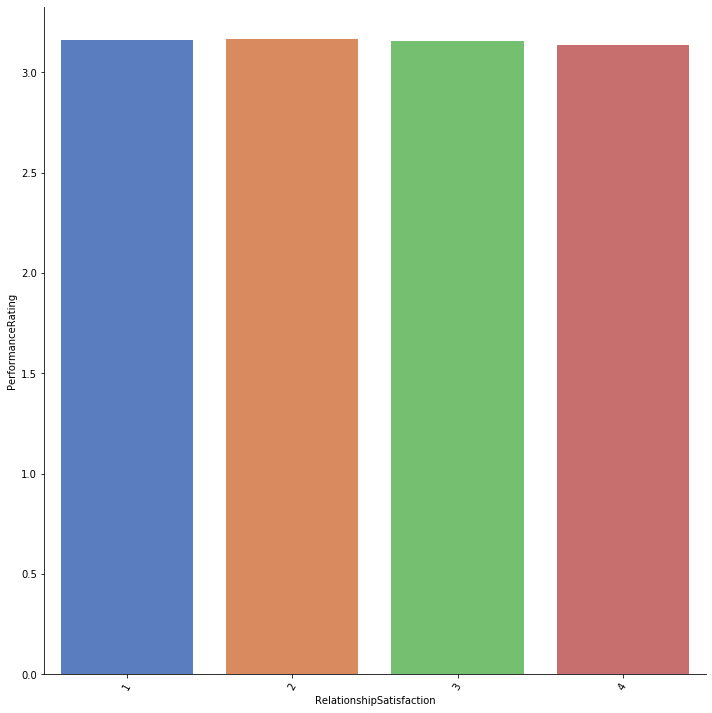

In [47]:
#plot of PerformanceRating Vs RelationshipSatisfaction
sns.catplot(x="RelationshipSatisfaction", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

All are performing well 

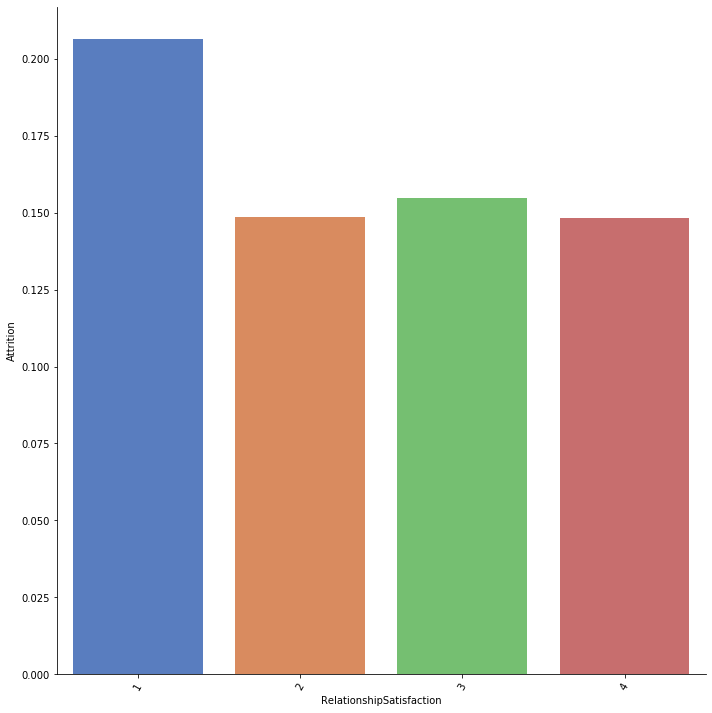

In [48]:
#plot of Attrition Vs RelationshipSatisfaction
sns.catplot(x="RelationshipSatisfaction", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

1 'Low' attrition rate is high when compared to 2 'Medium', 3 'High', 4 'Very High'

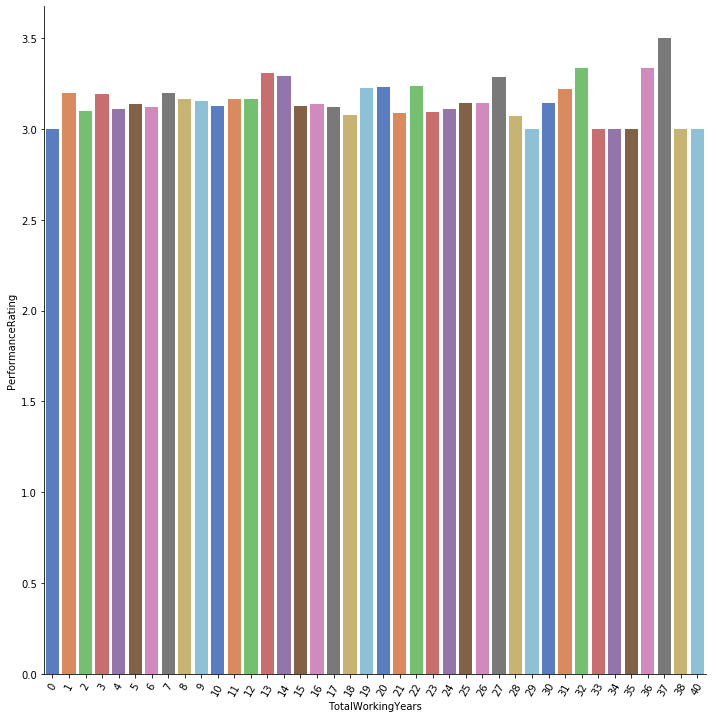

In [49]:
#plot of PerformanceRating Vs TotalWorkingYears
sns.catplot(x="TotalWorkingYears", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

37 years experienced prople are performing well

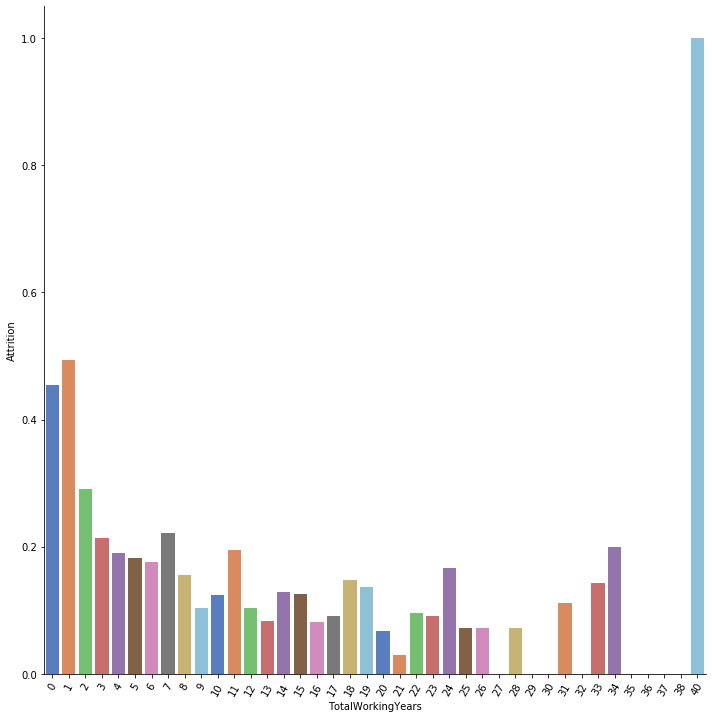

In [50]:
#plot of Attrition Vs TotalWorkingYears
sns.catplot(x="TotalWorkingYears", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

40years experienced people attrition rate is very high

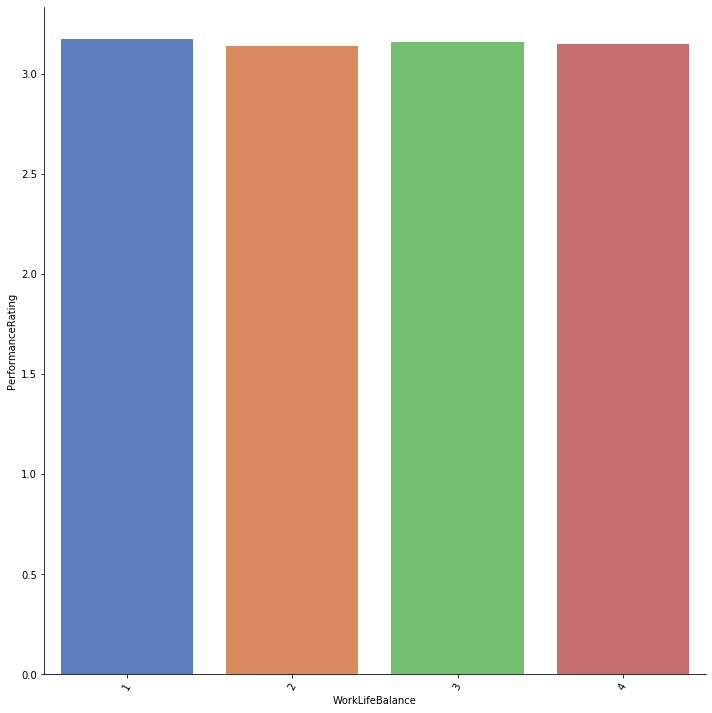

In [51]:
#plot of PerformanceRating Vs WorkLifeBalance
sns.catplot(x="WorkLifeBalance", y="PerformanceRating", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

all are performing well

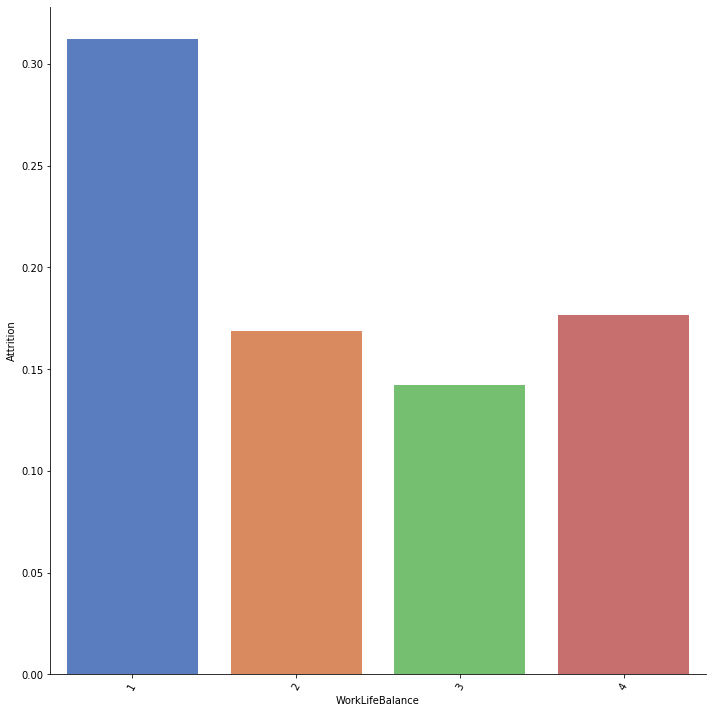

In [52]:
#plot of Attrition Vs WorkLifeBalance
sns.catplot(x="WorkLifeBalance", y="Attrition", data=p, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

low(1) attrition rate is high compared to others

In [53]:
p.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,...,0.282993,15.209524,3.153741,2.712245,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,...,0.450606,3.659938,0.360824,1.081209,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,...,0.000000,12.000000,3.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,...,0.000000,14.000000,3.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,...,1.000000,18.000000,3.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,...,1.000000,25.000000,4.000000,4.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


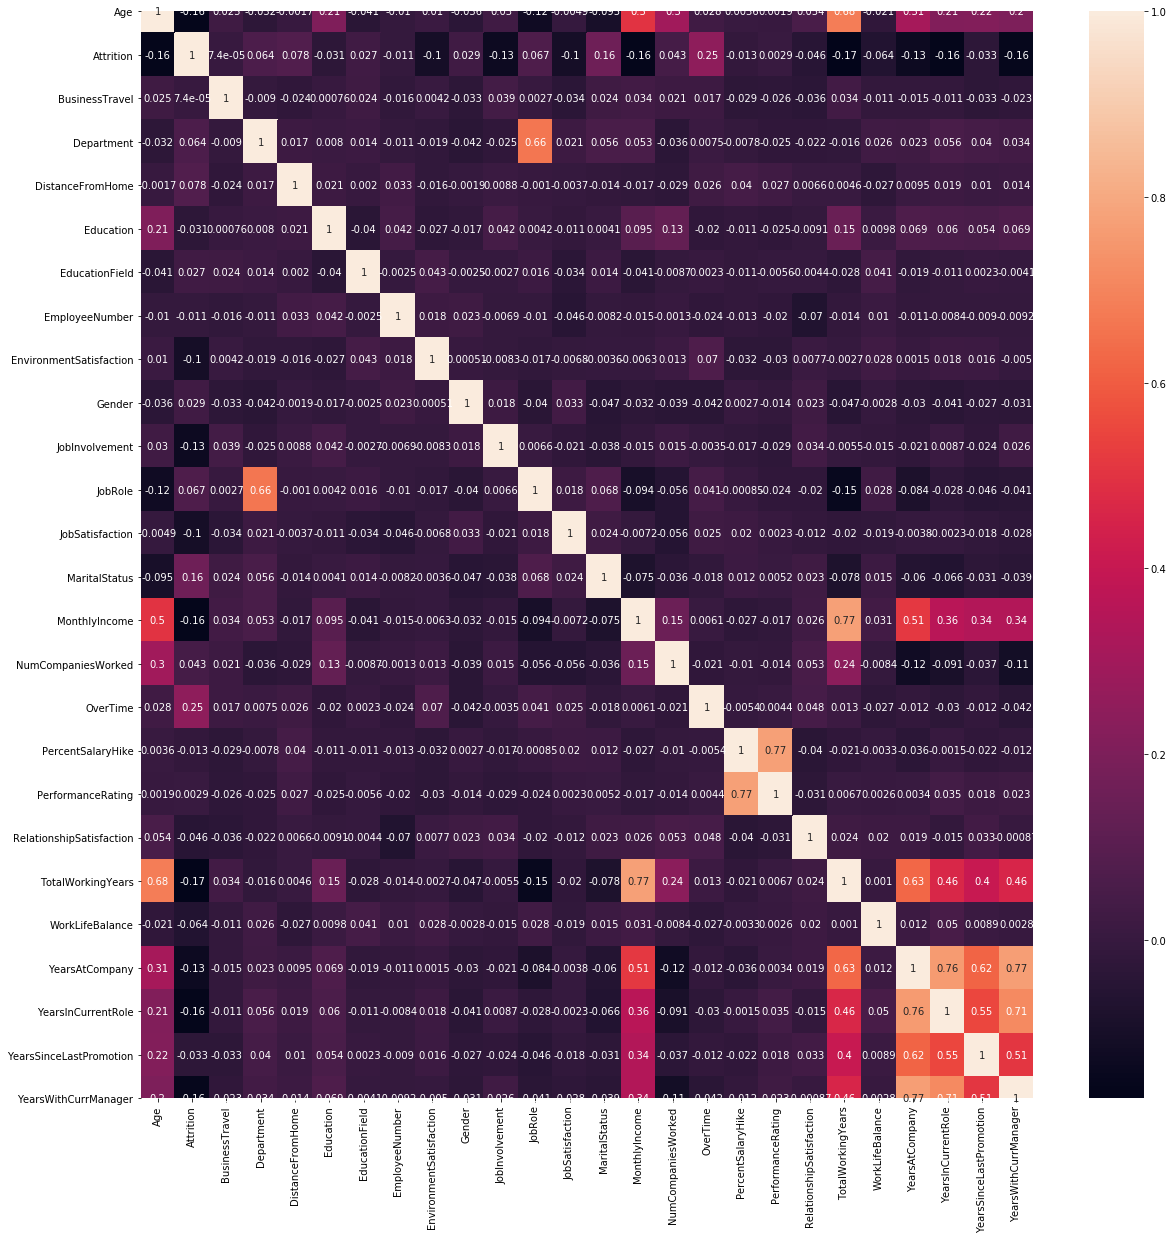

In [54]:
#Heatmaps
plt.figure(figsize=(20,20))
sns.heatmap(p.corr(),annot=True)
plt.show()

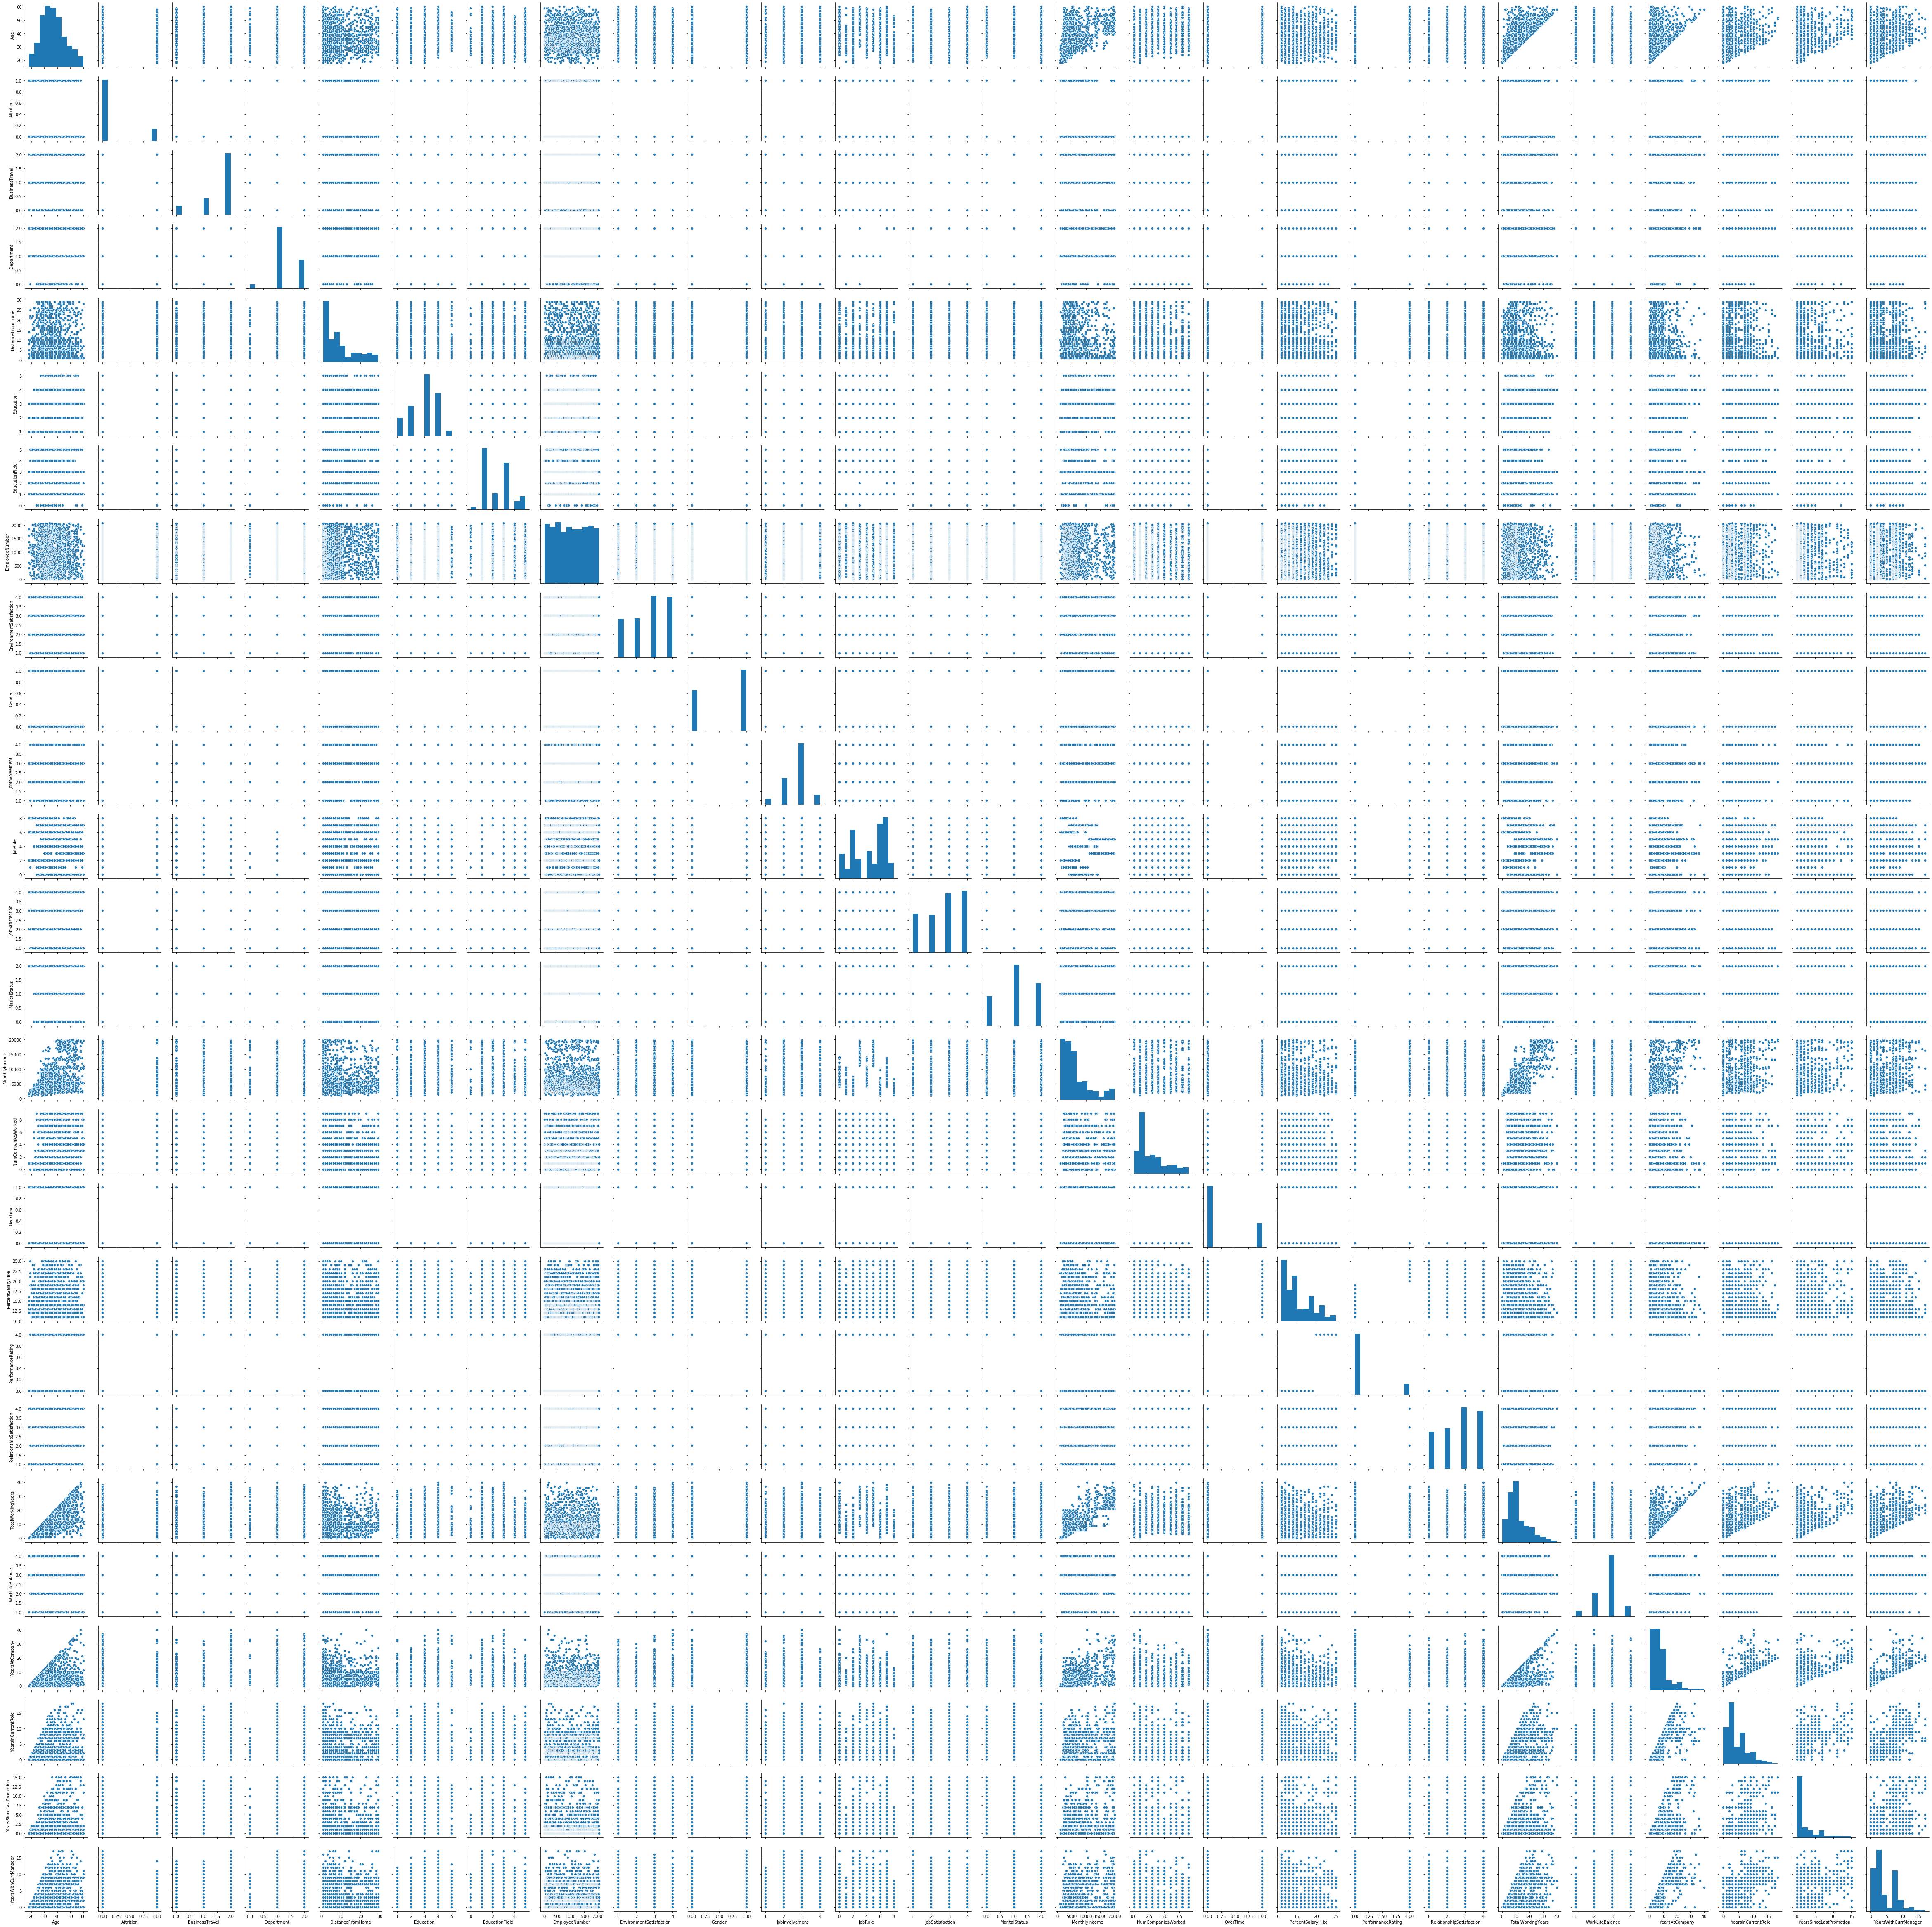

In [55]:
sns.pairplot(p)

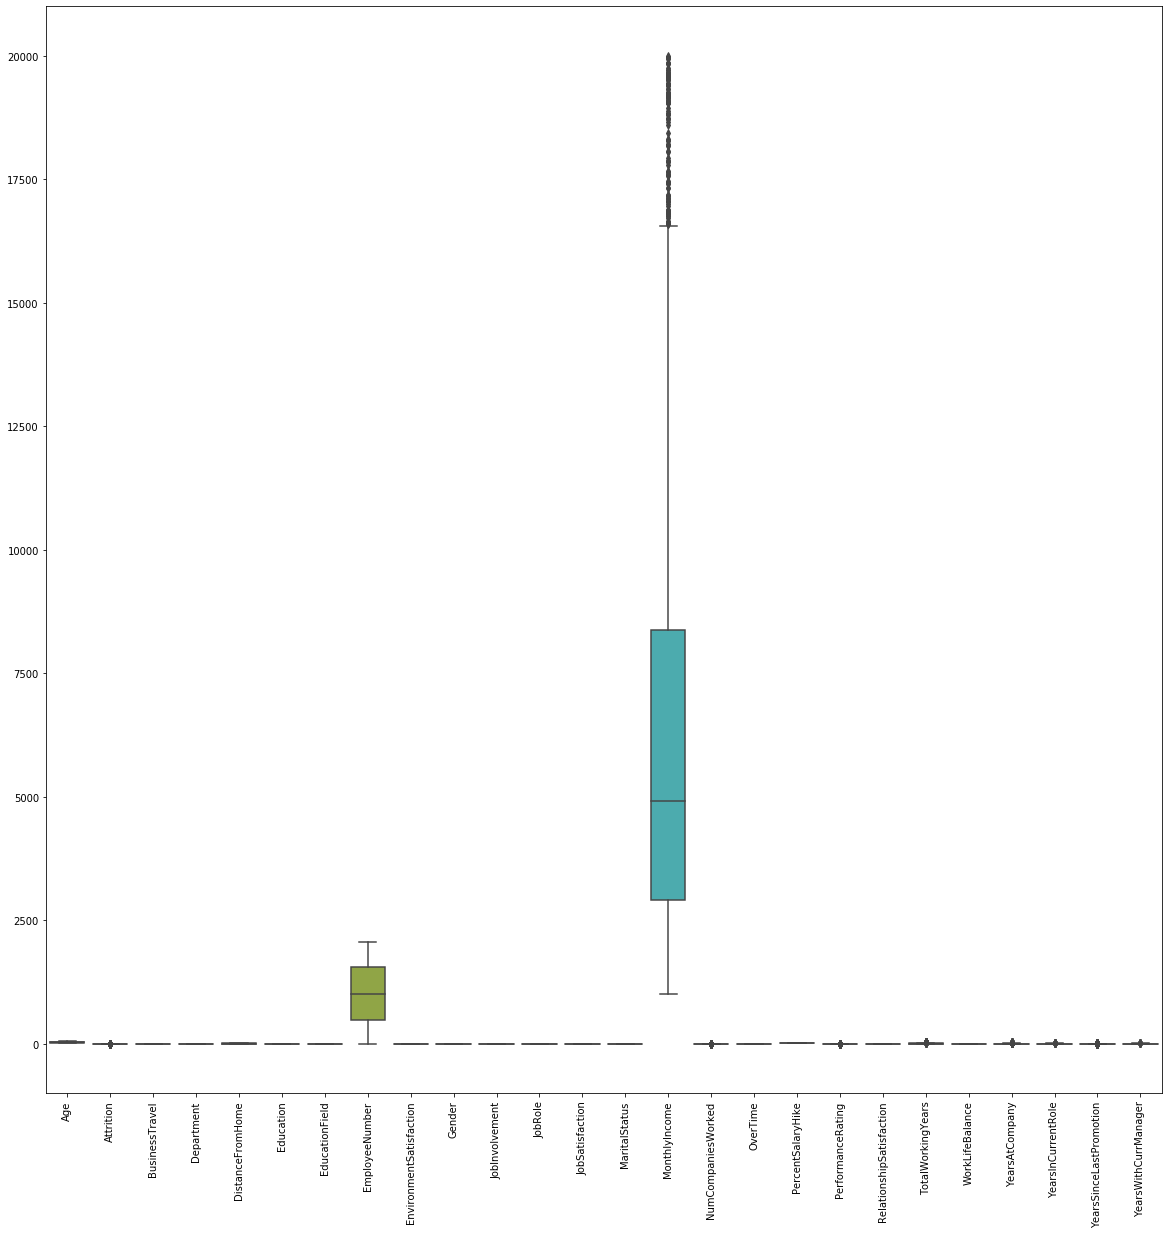

In [56]:
#Boxplot
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.boxplot(data=p)
plt.show()

In [57]:
p.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,1,2,0,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,1,8,1,1,2,3,1,...,0,23,4,4,10,3,10,7,1,7
2,37,1,2,1,2,2,4,4,4,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,1,3,4,1,5,4,0,...,1,11,3,3,8,3,8,7,3,0
4,27,0,2,1,2,1,3,7,1,1,...,0,12,3,4,6,3,2,2,2,2


In [76]:
#Storing the values in x and y
x=p.drop(['Attrition'], axis=1)
y=p['Attrition']

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [81]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)
score_logreg = logreg.score(xtest,ytest)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8798185941043084


C:\Users\manis\Downloads\Programs\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[366,   5],
       [ 48,  22]], dtype=int64)

In [83]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       414
           1       0.31      0.81      0.45        27

    accuracy                           0.88       441
   macro avg       0.65      0.85      0.69       441
weighted avg       0.95      0.88      0.90       441



In [87]:
#APPLYING DECISIONTREE ALGORITHM
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(random_state=0)
dec.fit(xtrain,ytrain)
ypred=dec.predict(xtest)
score=dec.score(xtest,ytest)
score

0.7845804988662132

In [88]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[324,  47],
       [ 48,  22]], dtype=int64)

In [89]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       372
           1       0.31      0.32      0.32        69

    accuracy                           0.78       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.79      0.78      0.79       441



In [92]:
#APPLYING RANDOMFOREST ALGORITHM
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(random_state=0)
ran.fit(xtrain,ytrain)
y_pre=ran.predict(xtest)
score=ran.score(xtest,ytest)
score

C:\Users\manis\Downloads\Programs\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8571428571428571

In [93]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pre)
cm

array([[365,   6],
       [ 57,  13]], dtype=int64)

In [94]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pre,ytest))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       422
           1       0.19      0.68      0.29        19

    accuracy                           0.86       441
   macro avg       0.58      0.77      0.61       441
weighted avg       0.95      0.86      0.89       441



In [95]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
y = knn.predict(xtest)
score_knn = knn.score(xtest,ytest)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8321995464852607


In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y)
cm

array([[359,  12],
       [ 62,   8]], dtype=int64)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y,ytest))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       421
           1       0.11      0.40      0.18        20

    accuracy                           0.83       441
   macro avg       0.54      0.63      0.54       441
weighted avg       0.93      0.83      0.87       441



In [98]:
#SVM
from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(xtrain,ytrain)
yp=sv.predict(xtest)
score=sv.score(xtest,ytest)
score

0.8412698412698413

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, yp)
cm

array([[371,   0],
       [ 70,   0]], dtype=int64)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(yp,ytest))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       441
           1       0.00      0.00      0.00         0

    accuracy                           0.84       441
   macro avg       0.50      0.42      0.46       441
weighted avg       1.00      0.84      0.91       441



C:\Users\manis\Downloads\Programs\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [101]:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(xtrain,ytrain)
ypr=nv.predict(xtest)
score=nv.score(xtest,ytest)
score

0.8072562358276644

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypr)
cm

array([[316,  55],
       [ 30,  40]], dtype=int64)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(ypr,ytest))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       346
           1       0.57      0.42      0.48        95

    accuracy                           0.81       441
   macro avg       0.71      0.67      0.68       441
weighted avg       0.79      0.81      0.80       441

